<h1>Calculation of Area under the curve using  Monte Carlo simulations!</h1>

In [966]:
# importing necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt

# selection of function

In [967]:
def f(x):
    #return 4* x **3 + 3* x**2
    #return 1 - math.sin(x)
    return math.exp(x)
    #return (1-math.sqrt(abs(x)))/2
    #return -4*x**3 + 3*x**2 +25*x + 6
    #return math.sin(x)
    #return x**2 - 5
    

<h1> defining the actual area </h1> 
<h4> here we used riemanns sums method to set a reference area</h4>

In [968]:
def actual(a,b):
    n = 10000
    Area = 0
    dx = (b-a)/n
    x = np.linspace(a,b,n) 
    for i in x:
        h = f(i)
        da = abs(h)*dx
        Area += da
    #print(f"the area by riemanns sums is {Area}")
    
    return Area
    

<h1>setting x limits and number of points</h1>

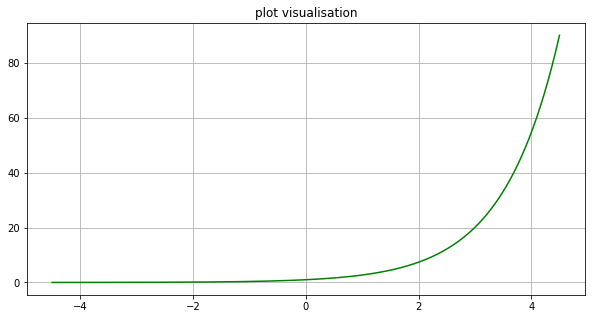

In [969]:
a = -4.5
b = 4.5
n = 800

y = []
x = np.linspace(a,b,n) 
for i in x:
    y.append(f(i))
plt.figure(figsize=(10,5))
plt.plot(x,y,'g')
plt.title("plot visualisation")
plt.grid()


<h2> generating random points</h2>

In [970]:
y = []                            
x = np.sort(np.random.uniform(a,b,n))
for i in x:
    y.append(f(i))
    
x_gen = x
y_gen = np.random.uniform(min(0,min(y)),max(max(y),0),len(x))  # any value within the interval is equally likely to be drawn

<h2>the array 'arr' stores these random points</h2>

In [971]:
arr = []
for i in range(len(x_gen)):
    arr.append([x_gen[i],y_gen[i]])

In [972]:
# area of the box enclosing entire curve
box_area = (max(x) - min(x)) * ((max(0,max(y))) - min(0,min(y)))

<h2>segregation of points</h2>

 box_area : 808.127305254473 
 enclosed area : 84.85336705171966 
 required area 90.03754048590082 

 points inside: 84 
 total points = 800

relative error is -5.757791034943882 %


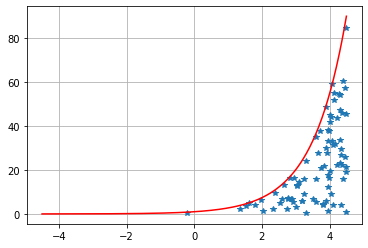

In [973]:
arr_in = []
points_in = 0
x_in, y_in = [],[]
for i in arr:
    if i[1] >= 0:
        if i[1] <= f(i[0]):
            arr_in.append(i)
            x_in.append(i[0])
            y_in.append(i[1])
            points_in += 1
    else:
        if i[1] >= f(i[0]):
            arr_in.append(i)
            x_in.append(i[0])
            y_in.append(i[1])
            points_in += 1
        
plt.plot(x_in,y_in,'*')
plt.plot(x,y,'r')
plt.grid()

area = (points_in/n) * box_area
rel_err = ((area/actual(a,b)) - 1) * 100
print(f' box_area : {box_area} \n enclosed area : {area} \n required area {actual(a,b)} \n\n points inside: {points_in} \n total points = {n}\n')
print(f'relative error is {rel_err} %')


<h1>Average out the areas for different number of points </h1>

In [974]:
def err_calc(n):                  # function to segregate points based on single n value.
    y = []
    x = np.sort(np.random.uniform(a,b,n))
    for i in x:
        y.append(f(i))

    x_gen = x
    y_gen = np.random.uniform(min(0,min(y)),max(max(y),0),len(x))
    arr = []
    for i in range(len(x_gen)):
        arr.append([x_gen[i],y_gen[i]])

    box_area = (max(x) - min(x)) * ((max(0,max(y))) - min(0,min(y)))

    arr_in = []
    points_in = 0
    x_in, y_in = [],[]
    for i in arr:
        if i[1] >= 0:
            if i[1] <= f(i[0]):
                arr_in.append(i)
                x_in.append(i[0])
                y_in.append(i[1])
                points_in += 1
        else:
            if i[1] >= f(i[0]):
                arr_in.append(i)
                x_in.append(i[0])
                y_in.append(i[1])
                points_in += 1


    area = (points_in/n) * box_area
    rel_err = ((area/actual(a,b)) - 1) * 100

    return rel_err , points_in
    

In [975]:
def range_calc(a,b):        # function to find areas for multiple number of points and give out the average area.
    n = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
    #n = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
    ratio_adder = 0
    print("points_in  total pts  relative error    ")
    for i in n:
        rel_err,points_in = err_calc(i)
        ratio_adder += (points_in/i)
        print(f"{points_in}          {i}        {rel_err}")
    
    avg_area = (ratio_adder/len(n)) * box_area
    return  avg_area
   

In [976]:
avg_area = range_calc(-5,5)
print(f'\n average area is {avg_area} \n required area is {actual(a,b)}')
print(f"\n relative error for avg. area is {((avg_area/actual(a,b))-1) * 100}")

points_in  total pts  relative error    
3          50        -47.89420159244304
6          100        -46.56803445869302
15          150        -11.222292002614942
26          200        10.922144122301948
21          250        -29.249114847783233
33          300        -5.122602951173305
43          350        9.888349596310775
47          400        5.272841120128535
63          450        25.726914756378292
52          500        -7.174830161557654
63          550        1.3041170998924434
79          600        17.235832901920254
72          650        -2.703208987214778
65          700        -16.673083761723507
83          750        -2.6639370272072305
77          800        -13.716420710851729
87          850        -8.283836264825627
114          900        13.506621394207574
114          950        7.520205094216581
129          1000        14.73374416814437

 average area is 87.40429815602693 
 required area is 90.03754048590082

 relative error for avg. area is -2.9246049

the following observations were made by averaging out the areas:
    1. for same number of points iteratively calculating the area 10 times and 
    averaging it shows that relative error fluctuations lowered down but was not as effective as point 2.
    2. if same process is repeated for diffrent number of points each time then
    the average area value lies very close to the actual area

# For closed curve

For a closed curve some conditions have to be changed.
For this case we have assumed that the limits of the curve will be provided to us.
Ideally the method should work properly on any type of closed curve but for our analysis we will only be considering curves with defined single equations.

In [977]:
def closed(x,y):
    return((x**2)+(y**2)-9)
    #return(((x**2)/4)+(y**2)-1)

In [1013]:
x_lim1,x_lim2 = -4,4
y_lim1,y_lim2 = -4,4

x_gen_c = np.sort(np.random.uniform(-4,4,100))
y_gen_c = np.sort(np.random.uniform(-4,4,100))


points=0
x1_c,y1_c=[],[]

for k in range(len(x_gen_c)):
    for j in range(len(y_gen_c)):
        if closed(x_gen_c[k],y_gen_c[j])<=0:
            x1_c.append(x_gen_c[k])
            y1_c.append(y_gen_c[j])
            points+=1

In [1002]:
box_area_c = (x_lim2-x_lim1)*(y_lim2-y_lim1)

In [1003]:
area_c = points*(box_area_c)/(len(x_gen_c)*len(y_gen_c))

In [1004]:
print("actual area of circle: ", np.pi*(3**2))
print("area calculated by us: ", area_c)

actual area of circle:  28.274333882308138
area calculated by us:  28.335104


For curves which have multiple domains we could check the position of the point in the range in which the particular curve is valid. We have not coded for the above said condition as the basic idea of this project was conveying the possible method of area calculation for curves in which numerical method cannot be applied easily.